 ### Sentiment analysis on skin care products

# *Sampling database*

##  1. Read the data into pandas data frame

In [1]:
import pandas as pd

df = pd.read_csv('reviews_skin_care.csv.gz', compression='gzip')

## 2. Explore the data

### *2.1 Overall data*

In [2]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A39HTATAQ9V7YF,0205616461,cheryl roberts,"[0, 0]",i do love this moisturizer and would recommend...,5.0,bio-active anti-aging serum,1369699200,"05 28, 2013"
1,A1WMRR494NWEWV,0733001998,Amazon Shopper,"[0, 0]","A nice moisturizer, all natural ingredients an...",4.0,Nice Moisturizer,1382572800,"10 24, 2013"
2,A327B0I7CYTEJC,130414643X,Sheri Hamlin,"[0, 0]",Dark circles under the eyes runs in my family ...,4.0,I really like this stuff.,1389052800,"01 7, 2014"
3,A1BG8QW55XHN6U,130414643X,Victoria,"[0, 0]",I have purchased on Amazon . This was the firs...,5.0,love this product,1372032000,"06 24, 2013"
4,AIFAAVTUYHEHB,130414643X,zoya,"[0, 0]",Is there any difference between the one typed...,4.0,the smell and color are different,1378252800,"09 4, 2013"
...,...,...,...,...,...,...,...,...,...
629294,A3LGT6UZL99IW1,B00LLPT4HI,"Richard C. Drew ""Anaal Nathra/Uthe vas Bethod...","[0, 0]",I have very dry elbows and knees. I have a to...,5.0,This stuff is amazing!,1405382400,"07 15, 2014"
629295,ASKZO80Z1RKTR,B00LLPT4HI,Robin Lee,"[1, 1]",This 100% Organic Raw Unrefined African Shea B...,5.0,"""Wonderful and Soothing Moisturizer""........",1405209600,"07 13, 2014"
629296,A1A7EBY8XJ46PA,B00LLPT4HI,R.Wang,"[0, 0]",I live in a hot dry climate and didn't find th...,5.0,TERRIFIC!,1405728000,"07 19, 2014"
629297,A1HQ0KTGWQIWYI,B00LLPT4HI,Sunny SMOOTH,"[0, 0]",Delivery time was very fast. This butter works...,5.0,"Fast delivery, and smooth skin",1405900800,"07 21, 2014"


*The data has 629299 entries and 9 columns:*

- reviewerID - ID of the reviewer
- asin - ID of the product
- reviewerName - name of the reviewer 
- helpful - helpfulness rating of the review
- reviewText - text of the review 
- overall - rating of the product 
- summary - summary of the review 
- unixReviewTime - time of the review (unix time) 
- reviewTime - time of the review (raw)

*Some rows have missing values (nan). We remove those rows from the dataset.*

In [3]:
df = df.dropna()

In [5]:
len(df)

625406

*Now we have left with 625406 entries.*

### *2.2 Exploring some of the reviews*

In [7]:
import random
#Randomly select reviews that have the rating 1
reviews_1 = df.loc[random.choices(df.loc[df['overall'] == 1].index, k=3)].reviewText
reviews_1
#Uncomment bellow if you want to read the whole text
with pd.option_context('display.max_colwidth', None): display(reviews_1)

104908                                                                                                                                                                                                        Just a warning, as it is not clear by the labeling or description.  This is not shea butter, it a silicone moisturizer in which shea butter is an ingredient.
164291    I got my jojoba oil in my shipment and it was scotch taped shut.  The seal on the inside was gone.  I am assuming this has been returned in the past, or someone filled it with another type of oil.  It smelled very different from the other one I have with the same brand.  This one almost smelled rancid.  I plan to return it and purchase somewhere else.
156183                                                                                                                                               I received the bottle of wintergreen oil with the safety foil seal on the bottle unsealed.  As I didn't know if it was a ma

In [8]:
#Randomly select reviews that have the rating 2
reviews_2 = df.loc[random.choices(df.loc[df['overall'] == 2].index, k=3)].reviewText
reviews_2
#Uncomment bellow if you want to read the whole text
with pd.option_context('display.max_colwidth', None): display(reviews_2)

535814                                                                            Used it but cannot see much difference in the brightness part .I am south Asian might be this is not for my skin type .Moisturizes the skin but the glowing effect is not there .I love the c booth volcanic mud mask it used to make my skin clean ,bright and glowing even after a single use ,but I cannot find that mask anywhere don't know why they discontinued it ,still searching for a good mask.
91565                                                                                                                                                                                                                                                                                                                                                                    I gave this product two stars because it smelled good!! I have def. had the pleasure of using much better lip balm!!
377605    I was so excited to see this on Am

In [41]:
#Randomly select reviews that have the rating 3
reviews_3 = df.loc[random.choices(df.loc[df['overall'] == 3].index, k=3)].reviewText
reviews_3
#Uncomment bellow if you want to read the whole text
#with pd.option_context('display.max_colwidth', None): display(reviews_3)

500056    I was introduced by BB creams from a sample I ...
515657    As shea butter can be quite expensive, the pri...
431453    The moisturizers work good but, I saw no impro...
Name: reviewText, dtype: object

In [42]:
#Randomly select reviews that have the rating 4
reviews_4 = df.loc[random.choices(df.loc[df['overall'] == 4].index, k=3)].reviewText
reviews_4
#Uncomment bellow if you want to read the whole text
#with pd.option_context('display.max_colwidth', None): display(reviews_4)

269233    It is good and really moisturizing your skin. ...
565071    This sunscreen goes on really well and is very...
163972    I think its helping my surface wrinkles, but n...
Name: reviewText, dtype: object

In [9]:
#Randomly select reviews that have the rating 3
reviews_5 = df.loc[random.choices(df.loc[df['overall'] == 5].index, k=3)].reviewText
reviews_5
#Uncomment bellow if you want to read the whole text
with pd.option_context('display.max_colwidth', None): display(reviews_5)

332991                                                                                                                                                                                                                                                                                                                                                                                                                                                                 I have been using this for several months. I notice the deep squint lines between my eyes are somewhat lessened as are other lines on my face. I read that a face product is supposed to be most beneficial when used over night so I use it then. I also put it on again first thing after washing my face in the morning and let it soak in before applying moisturizer and my foundation. I recommend it to anyone who wants an affordable retinol cream. In fact, I started using it after my dematologist recommended it, saying it was a good non-prescript

### *2.3  Statistics of the ratings*

In [44]:
df.overall.describe()

count    625406.000000
mean          4.203094
std           1.274848
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

*Average of the ratings was 4.2. Standard deviation (average of how much each rating deviates from the mean) was 1.3
. The 25% of the ratings fall bellow 4.0 and 50% of the ratings was below 5.0, and 75% of the ratings was bellow 5.0. Since more than half people gave the rating 5.0 for overall this dataset, the dataset is imbalanced towards positive ratings.*

(array([ 51665.,      0.,  32743.,      0.,      0.,  49387.,      0.,
         94727.,      0., 396884.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

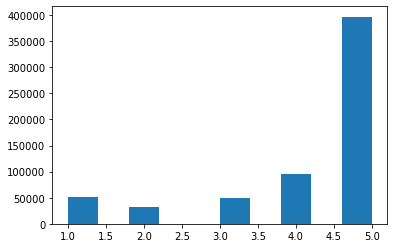

In [10]:
import matplotlib.pyplot as plt
plt.hist(df.overall)

*The above histogram also confirms that the dataset has more reviews that has rating 5.*

## 3. Sampling

*Let's make smaller balanced dataset by sampling. Let's randomly choose 750 reviews from reviews that have ratings 1, 2, 4, and 5, and choose 1500 reviews from reviews that have rating 3.*

In [12]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy={1:750, 2:750, 3: 1500, 4:750, 5:750},random_state=42)

df_resampled, y_resampled = rus.fit_resample(df, df.overall)

*After balanced sampling:*

(array([ 750.,    0.,  750.,    0.,    0., 1500.,    0.,  750.,    0.,
         750.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

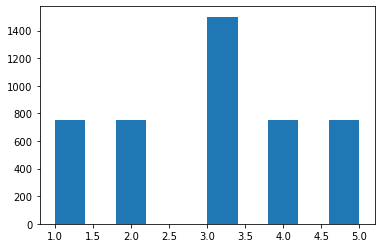

In [13]:
plt.hist(df_resampled.overall)

*Extract only text review parts and ratings and save it as small_corpus.*

In [14]:
small_corpus = df_resampled[['reviewText', 'overall']]

In [15]:
small_corpus

,reviewText,overall
0,I got soap in a bottle of what is supposted to...,1.0
1,I used this on my kids and my fair-skinned hus...,1.0
2,After months of emergency use simply because m...,1.0
3,"The product is a facial cream, but the picture...",1.0
4,I have been buying olive derived 100% Squalane...,1.0
...,...,...
4495,I use it before bed with Speedlash eyelash gro...,5.0
4496,It might be generic but it does the job withou...,5.0
4497,I have been using this eye cream for about a y...,5.0
4498,Exactly as pictured Great product. Will order ...,5.0


In [16]:
small_corpus = small_corpus.rename(columns={"reviewText":"reviews", "overall":"rating"})

In [17]:
small_corpus

,reviews,rating
0,I got soap in a bottle of what is supposted to...,1.0
1,I used this on my kids and my fair-skinned hus...,1.0
2,After months of emergency use simply because m...,1.0
3,"The product is a facial cream, but the picture...",1.0
4,I have been buying olive derived 100% Squalane...,1.0
...,...,...
4495,I use it before bed with Speedlash eyelash gro...,5.0
4496,It might be generic but it does the job withou...,5.0
4497,I have been using this eye cream for about a y...,5.0
4498,Exactly as pictured Great product. Will order ...,5.0


*Save the small corpus into csv file.*

In [18]:
small_corpus.to_csv(r'small_corpus.csv', index=False)